In [1]:
using BSON
using BSON: @save, @load
using Flux
using Plots

In [2]:
include("src/NN_Extender.jl")

Main.NN_Extender

In [3]:
NN_Extender.main()

///////////////////////////////////////////////////////////////////////////////
                                Extender
///////////////////////////////////////////////////////////////////////////////
    
Network would be changed from:
["identity", "relu", "relu", "identity"]
[10, 40, 30, 20, 1]
To:
["identity", "relu", "relu", "identity"]
[12, 50, 40, 30, 1]
Chain(Dense(12 => 50), Dense(50 => 40, relu), Dense(40 => 30, relu), Dense(30 => 1))


In [4]:
BSON.@load "model-pre-trained.bson" model
BSON.@load "output_model.bson" output_model

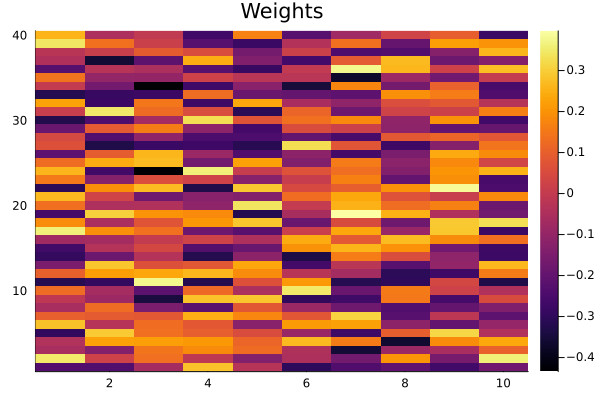

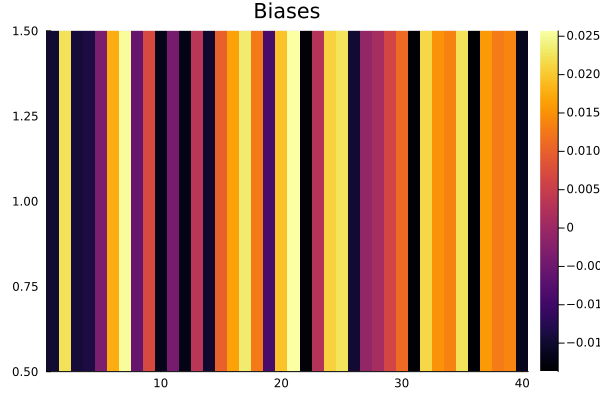

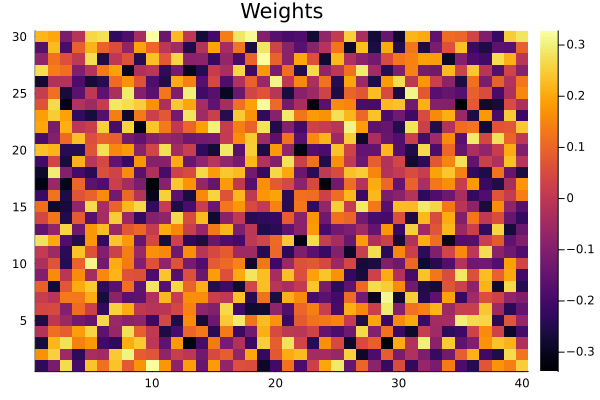

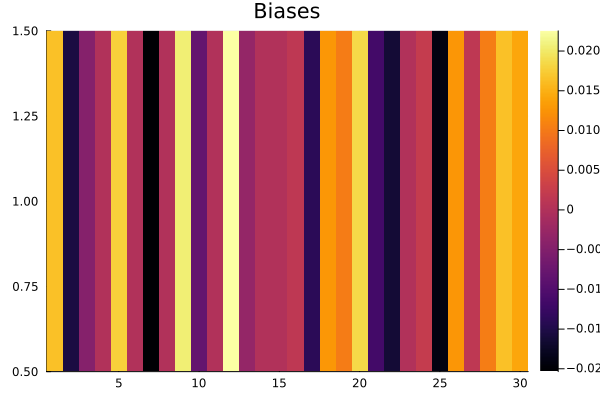

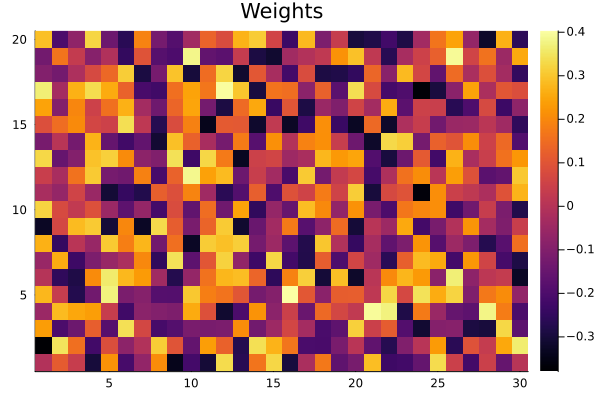

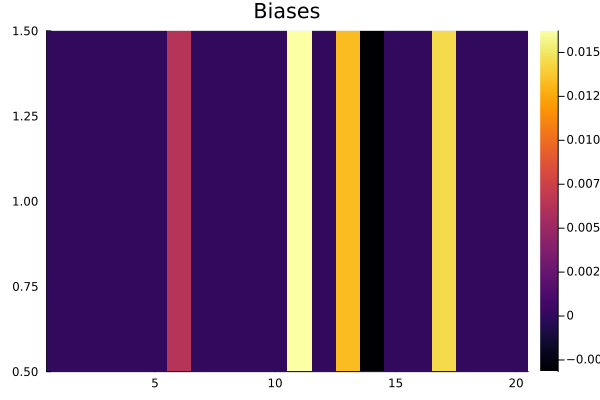

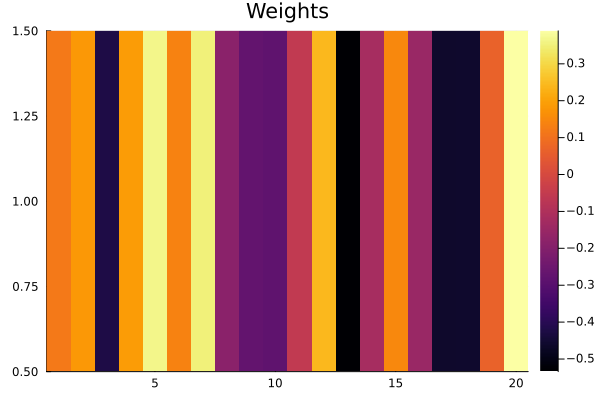

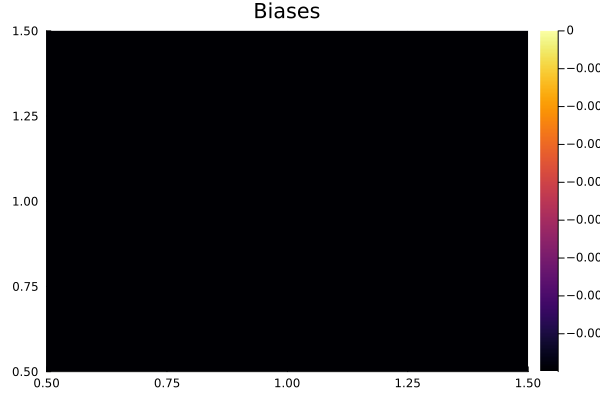

In [5]:
NN_Extender.plot_model_parameters(model)

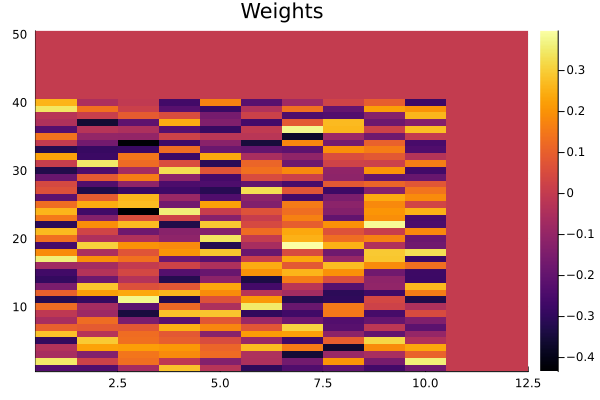

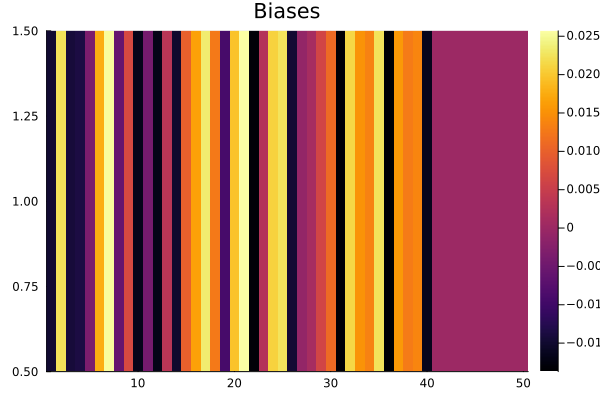

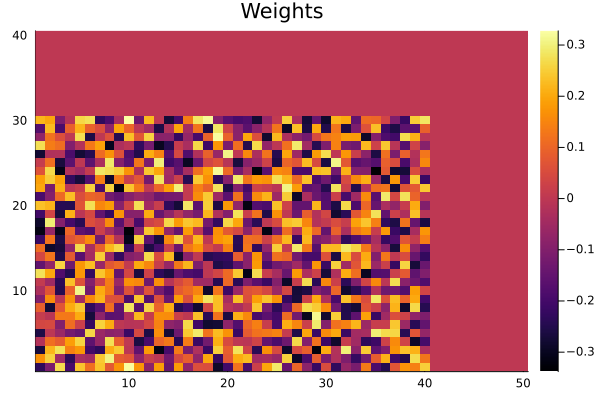

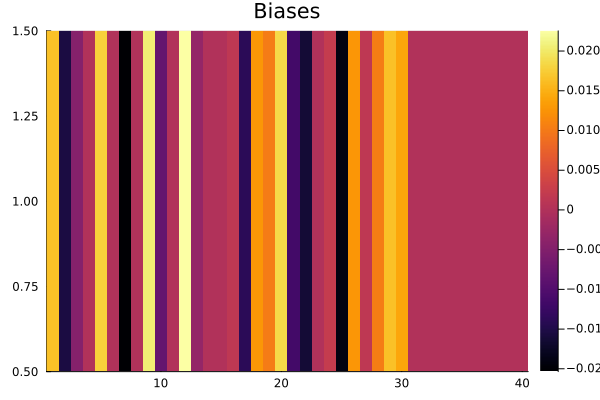

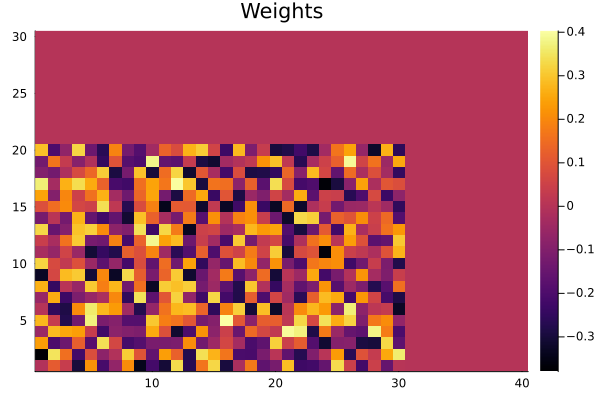

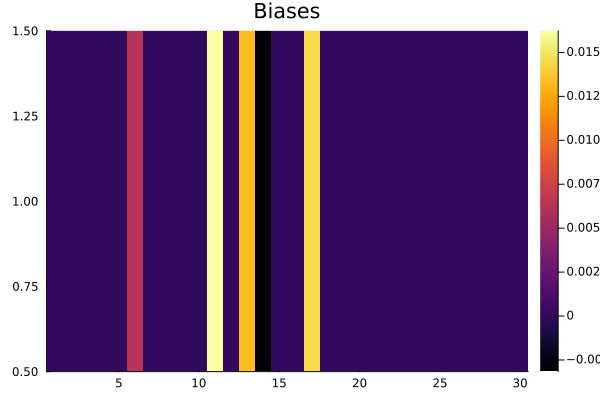

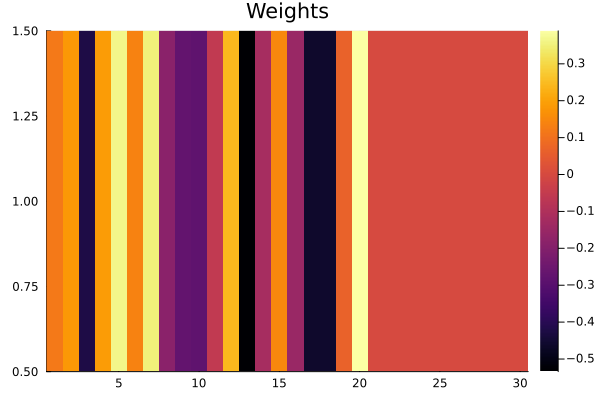

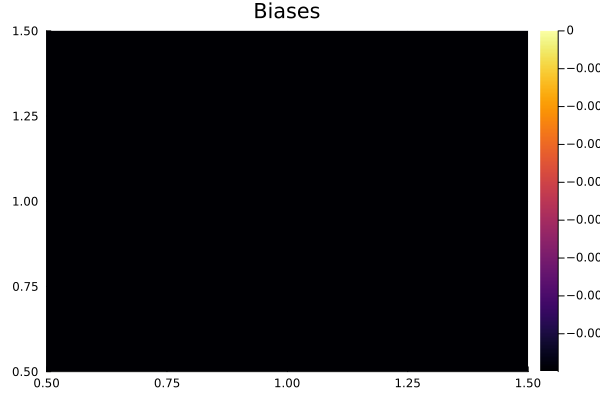

In [6]:
NN_Extender.plot_model_parameters(output_model)

In [7]:
input_vector1 = rand(10)
input_vector2 = [input_vector1; rand(); rand()]

12-element Vector{Float64}:
 0.14199751256122262
 0.01683842934736557
 0.7050072901686975
 0.7559114159214324
 0.4259495001305168
 0.8548181410637959
 0.1664911399701141
 0.1005750194069307
 0.8582086080884743
 0.881680016542262
 0.8347309854437596
 0.22808444858666443

In [8]:
model(input_vector1)

1-element Vector{Float64}:
 0.1323094093177227

In [9]:
output_model(input_vector2)

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(12 => 50)
│   summary(x) = 12-element Vector{Float64}
└ @ Flux /Users/mapo6213/.julia/packages/Flux/qZO6T/src/layers/stateless.jl:60


1-element Vector{Float32}:
 0.13230932

# Testing

In [10]:
mul = 10
for i in 1:100000
    input_vector1 = rand(10) .* mul
    input_vector2 = [input_vector1; rand() * mul; rand() * mul]
    result1 = model(input_vector1)
    result2 = output_model(input_vector2)
    if abs(result1[1] - result2[1]) >  0.00001
        println("Failed test")
        println("Difference: $(abs(result1[1] - result2[1]))")
    end
end